<a href="https://colab.research.google.com/github/nngiabao/MLPractice/blob/main/CNNExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#import libs
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [5]:
#load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
#preprocess data
x_train = x_train.reshape(-1,28,28,1).astype("float32")/255.0
x_test = x_test.reshape(-1,28,28,1).astype("float32")/255.0

In [7]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:

# Train
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 31ms/step - accuracy: 0.8817 - loss: 0.3679 - val_accuracy: 0.9870 - val_loss: 0.0509
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 32ms/step - accuracy: 0.9842 - loss: 0.0508 - val_accuracy: 0.9847 - val_loss: 0.0529
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.9887 - loss: 0.0350 - val_accuracy: 0.9902 - val_loss: 0.0391
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9913 - loss: 0.0274 - val_accuracy: 0.9893 - val_loss: 0.0379
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.9942 - loss: 0.0177 - val_accuracy: 0.9898 - val_loss: 0.0394


In [10]:
# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9855 - loss: 0.0409
Test accuracy: 0.9892


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


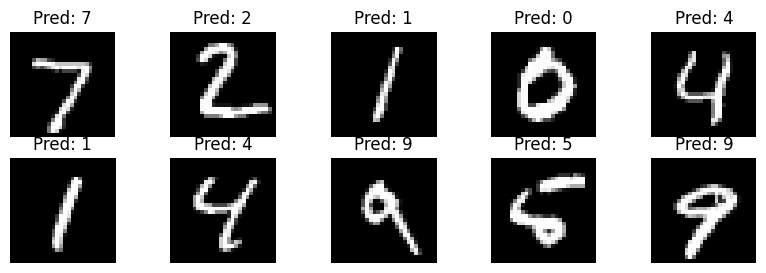

In [11]:
# Visualize sample predictions
predictions = model.predict(x_test)
plt.figure(figsize=(10, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {predictions[i].argmax()}")
    plt.axis('off')
plt.show()